In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib
import pandas as pd
matplotlib.use('agg')
import matplotlib.pyplot as plt
import random
import re

from sklearn import model_selection

/home/asr/tensorflow-cpu/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/asr/tensorflow-cpu/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
from stop_words import get_stop_words

## CORPORA: Specific vs Generic

In [3]:
%%time

# NOTE: Put in corpus_2 the largest corpus

num_lines_corpus_spec_1  = sum(1 for line in open('/home/asr/Data/classif_task/dev_data/calendar/jsgf/jsgf-calendar-1'))
num_lines_corpus_spec_2  = sum(1 for line in open('/home/asr/Data/classif_task/dev_data/calendar/subtitles/subtitle-cleaned-keyfiltered'))
#num_lines_corpus_2  = sum(1 for line in open('/home/asr/Data/classif_task/dev_data/generic/paisa-cleaned-v8-0'))
num_lines_corpus_gen_2  = sum(1 for line in open('/home/asr/Data/classif_task/dev_data/generic-maxlength16/generic-corpus-maxlength16-v1'))

ratio_cal = num_lines_corpus_spec_1 / float(num_lines_corpus_spec_2)
ratio = (num_lines_corpus_spec_1 + num_lines_corpus_spec_2) / float(num_lines_corpus_gen_2) #if num_lines_corpus_1 < num_lines_corpus_1 else num_lines_corpus_2 / float(num_lines_corpus_1)
print('Corpus_cal_1: %d, Corpus_cal_2: %d, Corpus_2: %d, Ratio: %0.3f' %(num_lines_corpus_spec_1, num_lines_corpus_spec_2, num_lines_corpus_gen_2, ratio)) 

Corpus_cal_1: 99412, Corpus_cal_2: 266442, Corpus_2: 10111563, Ratio: 0.036
CPU times: user 3.97 s, sys: 1.44 s, total: 5.41 s
Wall time: 5.4 s


In [4]:
ratio_cal = num_lines_corpus_spec_1 / float(num_lines_corpus_spec_2)
ratio_cal

0.37310934462284473

## Building the Data-Frame (Balanced)

In [5]:
ratio = (num_lines_corpus_spec_1 + ratio_cal*num_lines_corpus_spec_2) / float(num_lines_corpus_gen_2)

In [122]:
def load_dataset(directory_1, directory_2, directory_3):
    # NOTE: Put in directory_2 the largest corpus
    data = {}
    data["sentence"] = []
    data["class"] = []
    l1 = 0
    for file_path in os.listdir(directory_1):
        with tf.gfile.GFile(os.path.join(directory_1 , file_path), "rb") as f:
                # strip() removes white spaces before and after the string
                # decode() converst a byte object ('b) in a python3 string
                list_of_sentences = [s.strip().decode() for s in f.readlines()]
                num_rows_1 = len(list_of_sentences)
                for i in range(num_rows_1):
                    data["sentence"].append(list_of_sentences[i])
                    data["class"].append(int(1))
    
    for file_path in os.listdir(directory_2):
        with tf.gfile.GFile(os.path.join(directory_2 , file_path), "rb") as f:
                # strip() removes white spaces before and after the string
                # decode() converst a byte object ('b) in a python3 string
                list_of_sentences = [s.strip().decode() for s in f.readlines() if np.random.random() <= ratio_cal]
                num_rows_1 = len(list_of_sentences)
                for i in range(num_rows_1):
                    data["sentence"].append(list_of_sentences[i])
                    data["class"].append(int(1))
    
    for file_path in os.listdir(directory_3):
        with tf.gfile.GFile(os.path.join(directory_3, file_path), "rb") as f:
            # Balancing the dataset
            list_of_sentences = [s.strip().decode() for s in f.readlines() if np.random.random() <= ratio]
            for i in range(len(list_of_sentences)):
                data["sentence"].append(list_of_sentences[i])
                data["class"].append(int(0))
    return pd.DataFrame.from_dict(data)




In [123]:
%%time
directory_1 = '/home/asr/Data/classif_task/dev_data/calendar/jsgf/'
directory_2 = '/home/asr/Data/classif_task/dev_data/calendar/subtitles/'
directory_3 = '/home/asr/Data/classif_task/dev_data/generic-maxlength16/'

#directory_1 = '/home/asr/Data/classif_task/jsgf_data/email/'
#directory_2 = '/home/asr/Data/classif_task/jsgf_data/reminder/'

dataset_df = load_dataset(directory_1, directory_2, directory_3)

CPU times: user 34.2 s, sys: 2.53 s, total: 36.7 s
Wall time: 36.8 s


In [124]:
# Check Balanced
dataset_df.groupby('class').count()

,sentence
class,
0,199457
1,198734


In [125]:
# Print some samples
for i in range(10):
    print(dataset_df.iloc[i]['sentence'])
    print(dataset_df.iloc[-i -1]['sentence'])

modifica attività
ma è anche come mille biscioni insaponati che non sai dove finisce uno e dove comincia
fai partire calendario
ma è anche certo che quei personaggi non servono né a scamarcio né alla chiatti per
mostrami la vista giorno nel calendario
ma è anche abbastanza normale che lincumbent faccia valere il proprio peso di mercato gli asset
vorrei aprire calendario e visualizza settimana
ma è altrettanto importante ricordare in mazzoni l'uso e la conoscenza degli elementi classici e delle
mostra applicazione agenda per favore e visualizza settimana
ma è altresì necessario non limitarsi alla difesa nei processi connotata da difficoltà tuttaltro che lievi
vorrei vedere la vista giorno nell'applicazione calendario per piacere
ma è altresì dimostrata la sua azione di desistenza rispetto al genocidio nei confronti delle locali
puoi aprire vista settimana nell'app calendario per favore ?
cantata dal bassista curt smith
imposta notifiche nelle impostazioni dell'agenda
a scoprire nei trip

In [126]:
dataset_df.head(5)

,sentence,class
0,modifica attività,1
1,fai partire calendario,1
2,mostrami la vista giorno nel calendario,1
3,vorrei aprire calendario e visualizza settimana,1
4,mostra applicazione agenda per favore e visual...,1


In [127]:
dataset_df.tail(5)

,sentence,class
398186,ma è altresì necessario non limitarsi alla dif...,0
398187,ma è altrettanto importante ricordare in mazzo...,0
398188,ma è anche abbastanza normale che lincumbent f...,0
398189,ma è anche certo che quei personaggi non servo...,0
398190,ma è anche come mille biscioni insaponati che ...,0


### Statistics about the dataset

In [128]:
# Counting number of words and mean
dataset_df.astype('str').applymap(lambda x: str(x).count(' ') + 1).mean()

sentence    11.101886
class        1.000000
dtype: float64

In [129]:
# Max length sentence
dataset_df.astype('str').applymap(lambda x: str(x).count(' ') + 1).max()

sentence    26
class        1
dtype: int64

In [130]:
# Max length sentence
dataset_df.astype('str').applymap(lambda x: str(x).count(' ') + 1).std()

sentence    4.147538
class       0.000000
dtype: float64

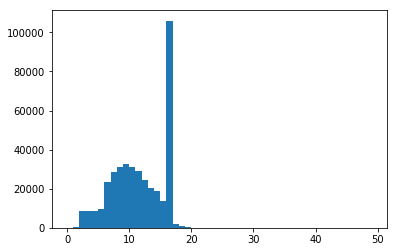

In [131]:
# Histogram of the lengths
%matplotlib inline

length_sentence = dataset_df.astype('str').applymap(lambda x: str(x).count(' ') + 1)
plt.hist(length_sentence['sentence'],bins=range(50))
plt.show()

### Shuffle the Dataset

In [132]:

index = [i for i in range(dataset_df.shape[0])]
random.shuffle(index)
dataset = dataset_df.set_index([index]).sort_index()

dataset.head(10)

,sentence,class
0,dal punto di vista costruttivo le torri evapor...,0
1,idem per le prestazioni,0
2,accetterei un forse ogni giorno della settimana,1
3,stessa storia della scorsa settimana uomo bian...,1
4,dati auditel mondiali 2010 pane amore e privat...,0
5,il cespuglio è una forma di allevamento libera...,0
6,lesplorazione della superficie e la bassa atmo...,0
7,oggi parte la settimana dei test,1
8,dallincarico dopo la 31ª giornata a causa degl...,0
9,puoi aprire gli eventi nell'applicazione agenda ?,1


In [133]:
#dataset.to_csv('/home/asr/Data/classif_task/dev_data/dataset_blc.txt', sep='\t')

In [134]:
exclude1 = ['\t', '"', '?'] # list
exclude2 = ["'", "  ", "   ", "    ", "     "] # list

def clean_text(text):
    for c in exclude1:
        text=text.replace(c,'')
    for c in exclude2:
        text=text.replace(c, " ")
    return text.lower().strip()

sentence_processed = list(map(lambda text: clean_text(text), dataset['sentence'].values))

dataset['sentence'] = sentence_processed

dataset.head(20)

,sentence,class
0,dal punto di vista costruttivo le torri evapor...,0
1,idem per le prestazioni,0
2,accetterei un forse ogni giorno della settimana,1
3,stessa storia della scorsa settimana uomo bian...,1
4,dati auditel mondiali 2010 pane amore e privat...,0
5,il cespuglio è una forma di allevamento libera...,0
6,lesplorazione della superficie e la bassa atmo...,0
7,oggi parte la settimana dei test,1
8,dallincarico dopo la 31ª giornata a causa degl...,0
9,puoi aprire gli eventi nell applicazione agenda,1


In [30]:
for i in range(10):
    print(dataset.iloc[i]['sentence'])
    print(dataset.iloc[-i -1]['sentence'])

vorrei aggiungere appuntamento all agenda per ogni weekend
larmistizio di vignale
continuò fino alsalvo l interruzione della seconda guerra mondiale e fu progettata per un pubblico femminile borghese
parte di itachi sasuke visse solo con lo scopo di vendicare la famiglia e uccidere il
attribuzione errata
identificare tutto il gruppo
puoi creare un appuntamento alle cinque di mattina per favore
solo si rifiuta ma gli darà la mano in segno di rispetto
puoi creare un evento chiamato appuntamento con massimo alle sette e quarantacinque ogni primo weekend del mese
cioe un vero appuntamento che non fosse con un paziente o suo figlio
variabili superando talora anche i 300 metri
a poppa due tramogge per bombe torpedini da getto da 50 e 100 kg e due
poi piu tardi se ne andra e rimarremo solo io e te per l evento principale
grandi edifici il museo de logroňo con collezioni di sculture e quadri di varie epoche e
la membrana della maggior parte di questi batteri grampositivi è acido micolico con p

In [135]:
splitter = model_selection.StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=19850610)

splits = list(splitter.split(X=dataset['sentence'], y=dataset['class']))
main_index = splits[0][0]
test_index = splits[0][1]

main_df = dataset.loc[main_index,:]
print('Training-Set size: %d' %len(main_df))

test_df = dataset.loc[test_index,:]
print('Test-Set size: %d' %len(test_df))


Training-Set size: 338462
Test-Set size: 59729


In [136]:
main_df = main_df.dropna()
len(main_df.dropna())

338462

In [137]:
test_df = test_df.dropna()
len(test_df.dropna())

59729

In [138]:
splitter =  model_selection.StratifiedShuffleSplit(n_splits=1, test_size=0.79, random_state=19850610)

splits = list(splitter.split(X=main_df['sentence'], y=main_df['class']))
train_index = splits[0][0]
infer_index = splits[0][1]

train_df = main_df.loc[train_index,:]
print('Training-Set size: %d' %len(train_df))

infer_df = main_df.loc[infer_index,:]
print('Inference-Set size: %d' %len(infer_df))

Training-Set size: 71077
Inference-Set size: 267385


/home/asr/tensorflow-cpu/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [139]:
train_df = train_df.dropna()
len(train_df)

60603

In [140]:
infer_df = infer_df.dropna()
len(infer_df)

227162

In [141]:
print("Training Set")
training_value_counts = train_df['class'].value_counts()
print(training_value_counts)
print("class 0 %: {}".format(round(training_value_counts[0]/len(train_df)*100,2)))
print("class 1 %: {}".format(round(training_value_counts[1]/len(train_df)*100,2)))
print("")
print("Test Set")
validation_value_counts = test_df['class'].value_counts()
print(validation_value_counts)
print("class 0 %: {}".format(round(validation_value_counts[0]/len(test_df)*100,2)))
print("class 1 %: {}".format(round(validation_value_counts[1]/len(test_df)*100,2)))
print("")
print("Inference Set")
inference_value_counts = infer_df['class'].value_counts()
print(inference_value_counts)
print("class 0 %: {}".format(round(inference_value_counts[0]/len(infer_df)*100,2)))
print("class 1 %: {}".format(round(inference_value_counts[1]/len(infer_df)*100,2)))

Training Set
0.0    30441
1.0    30162
Name: class, dtype: int64
class 0 %: 50.23
class 1 %: 49.77

Test Set
0    29919
1    29810
Name: class, dtype: int64
class 0 %: 50.09
class 1 %: 49.91

Inference Set
0.0    113715
1.0    113447
Name: class, dtype: int64
class 0 %: 50.06
class 1 %: 49.94


In [148]:
train_df['class'] = train_df['class'].apply(lambda x: str(int(x)))
test_df['class'] = test_df['class'].apply(lambda x: str(int(x)))
infer_df['class'] = infer_df['class'].apply(lambda x: str(int(x)))

In [150]:
train_df.to_csv(os.path.join(os.getcwd(), './dataset/train-data-maxlength16-subtitles.tsv'), header=False, index=False, sep='\t')
test_df.to_csv(os.path.join(os.getcwd(), './dataset/test-data-maxlength16-subtitles.tsv'), header=False, index=False, sep='\t')
infer_df.to_csv(os.path.join(os.getcwd(), './dataset/infer-data-maxlength16-subtitles.tsv'), header=False, index=False, sep='\t')

In [27]:
tt = pd.read_csv(os.path.join(os.getcwd(), 'data-preparation/train-data-maxlength16-subtitles.tsv'), sep='\t', names=['sentence','class'])
#tt['sentence'].iloc[0:20]

## Calculate Vocabulary and Save it

In [87]:
stop_words = get_stop_words('italian') + get_stop_words('english')

my_stop_words = ['puoi','posso','vediamo','guarda','vorrei','voglio','dici','fammi']
for my_word in my_stop_words:
    stop_words.append(my_word)

In [88]:
#stop_words

In [89]:
ww = ['criks', 'crjis3','cr456is', '45crist','1v','f4','16','l','9','5ffff56566778','cv']

falseIfDigit = lambda word: not bool((re.match('^(?=.*[0-9])', str(word))))

[w for w in ww if (falseIfDigit(w) or w.isdigit()) and (len(w) > 2 or w.isdigit()) ]

['criks', '16', '9']

In [91]:

# This function returns FALSE if there is a digit in the string (i.e '4mmm', 'm44m', 'llp4')
falseIfDigit = lambda word: not bool((re.match('^(?=.*[0-9])', str(word))))

def get_vocab():
    #allWords = []
    vocab = set()
    for text in train_df['sentence'].values:
        text = str(text)
        words = text.split(' ')
        # remove digits
        words_only = [w for w in words if not w.isdigit()]
        # exclude words shorter than 2, but not numbers. exclude words with numbers inside, i.e. '3cris', 'c45ris', 'cris23'
        words_ = [w for w in words_only if (falseIfDigit(w) or w.isdigit()) and (len(w) > 2 or w.isdigit()) ]
        #allWords = allWords + words_
        word_set = set(words_)
        vocab.update(word_set)
    
    #vocab.remove('')
    return list(vocab)#, allWords

def get_all_words():
    allWords = []
    cnt = 0
    for text in train_df['sentence'].values:
        text = str(text)
        words = text.split(' ')
        # remove digits
        words_only = [w for w in words if not w.isdigit()]
        # exclude words shorter than 2, but not numbers. exclude words with numbers inside, i.e. '3cris', 'c45ris', 'cris23'
        words_ = [w for w in words_only if (falseIfDigit(w) or w.isdigit()) and (len(w) > 2 or w.isdigit()) ]
        allWords = allWords + words_
        #word_set = set(words_)
        cnt += 1
        if cnt%10000==0:
            print('-----------', cnt)
    
    return allWords



In [92]:
%%time
vocab = get_vocab()
print(len(vocab))


59763
CPU times: user 1.39 s, sys: 66 µs, total: 1.39 s
Wall time: 1.39 s


In [93]:
%%time
allWords = get_all_words()
len(allWords)

----------- 10000
----------- 20000
----------- 30000
----------- 40000
----------- 50000
----------- 60000
----------- 70000
CPU times: user 5min 5s, sys: 151 ms, total: 5min 5s
Wall time: 5min 5s


In [94]:
from collections import Counter
cnt_allWords = Counter(allWords)

In [95]:
vocab_words_sorted_by_appearence = sorted(cnt_allWords.items(), key=lambda kv: len(vocab) - kv[1])
#vocab_words_sorted_by_appearence

In [96]:
vocab_words_sorted_by_appearence_list = [word[0] for word in vocab_words_sorted_by_appearence]
#vocab_words_sorted_by_appearence_list, len(vocab_words_sorted_by_appearence_list)


In [97]:
STOP_WORDS = True
REDUCED_SIZE_VOC = True
SIZE_VOC = 5000

vocab = vocab_words_sorted_by_appearence_list

if STOP_WORDS:
    vocab = [w for w in vocab if w not in stop_words]
    words_and_frequence = [ (word, freq) for (word, freq) in vocab_words_sorted_by_appearence if word not in stop_words]

print(len(vocab))
if REDUCED_SIZE_VOC:
    vocab = vocab[0:SIZE_VOC]
print(len(vocab))


59453
5000


### Building a Mixed Vocabulary
###### half of most frequent words, half of random selection among all the words (uniform distribution)

In [69]:
# From 0 to boundary_point: words selected by their frequency (the most frequent words)
# From boundary_point to len(voc): words random selected
boundary_point = 19000

def random_selection_from_vocab(vocabulary, start):
    length_voc = len(vocabulary)
    vocab = np.array(vocabulary)
    indxs = np.random.choice(range(start, length_voc), length_voc - start, replace=False)
    return list(vocab[indxs])

vocab = vocab[0:boundary_point] + random_selection_from_vocab(vocab, boundary_point)
vocab[0:10]

['settimana',
 'attività',
 'favore',
 'piacere',
 'appuntamento',
 'calendario',
 'prossimo',
 'evento',
 'condividere',
 'nome']

In [30]:
#words_and_frequence

In [98]:
# Check if a word is in VOC or STOP_WORDS
ww = 'agenda'
print(ww in stop_words)
print(ww in vocab)

False
True


In [100]:
PAD_WORD = '#=KS=#'

PATH_VOC = os.path.join(os.getcwd(), 'dataset/vocab_5k.tsv')
with open(PATH_VOC , 'w') as file:
#with open('/home/asr/Data/classif_task/jsgf_data/vocab_list.tsv', 'w') as file:
    file.write("{}\n".format(PAD_WORD))
    for word in vocab:
        file.write("{}\n".format(word))
        
PATH_WORDS = os.path.join(os.getcwd(), 'dataset/n_words_5k.tsv')        
with open(PATH_WORDS, 'w') as file:
#with open('/home/asr/Data/classif_task/jsgf_data/n_words.tsv', 'w') as file:
    file.write(str(len(vocab)))

